# Table of Content

1. [Introduction](#Introduction)
2. [Imports](#Imports)
3. [Data Processing](#Data-Processing) <br>
3.1 [Normalization](#Normalization) <br>
3.2 [Categorization](#Categorization) <br>
3.3 [Train-test Split](#Train-test-Split) <br>
3.4 [Data Augmentation](#Data-Augmentation) <br>
4. [Convolutional Autoencoder](#Convolutional-Autoencoder)  <br>
4.1 [Visualise Reconstructed Images](#Visualise-Reconstructed-Images) <br>
4.2 [Salt and Peper Noise](#Salt-and-Peper-Noise) <br>
4.3 [Visualise Denoised Images](#Visualise-Denoised-Images) <br>
3.3 [Train-test Split](#Train-test-Split) <br>
5. [Categorization Neural Network](#Categorization-Neural-Network) <br>
5.1 [Train-test Split](#Train-test-Split) <br>
5.2 [Data Augmentation](#Data-Augmentation) <br>
5.3 [Model](#Model) <br>
6. [Evaluate Model](#Evaluate-Model)

## Introduction

This notebook is an attempt at solving a CAPTCHA test.
This CAPTCHA is an 5 letter with noise (a blur and line that crosses the word).
I approcahed the problem by initially segmenting the word using OpenCV (see the notebook). This mainly enables to remove the blur and reduce the width of the line. <br>
Since this is not enough, to have a reliable prediction of the word, I explored autoencoders using Keras with a Tensorflow backend. Autoencoders are very simply two Neural Networks plugged to each other: the encoder reduces the dimensions of the data (compressing it) and the decoder expands the dimensions (decompressing/reconstructing it). Thus they are very good at denoising data. Since the images are not clear yet, using an autoencoder is ideal for further data cleaning. So I chose for each letter the most (humanly) readable letter and trained the AE on reconstructing these ideal letters.<br>
Because the CAPTCHA dataset is very small, I used Data Augmentation to enlarge it. Autoencoders are data specific, this means given very different data it will not perform well, so I will add salt and pepper noise to the data and retrain our model. <br>
At this point our model is able to denoise varied CAPTCHA Images so I use the Encoder Neural Network to predict the label of the letter and decipher the word.

## Imports

In [1]:
import numpy as np
import pandas as pd
import os.path
from imutils import paths
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Dense, Dropout, Input, Flatten, MaxPooling2D, UpSampling2D
from keras.models import Model
import keras.optimizers
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


C:\Users\Paul Fournier\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Processing

Load the CAPTCHA images, the target images and the labels.

In [2]:
LETTER_FOLDER = "letters"
data = []
target = []
labels = []

for image_file in paths.list_images(LETTER_FOLDER):
    # Load the image.
    image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)

    # Add a third channel dimension to the image.
    image = np.expand_dims(image, axis=2)

    # Get the folder name (ie. the true character value).
    label = image_file.split(os.path.sep)[-2]

    # Add the image and char to the dictionary.
    data.append(image)
    if label == '2':
        img = cv2.imread('letters/2/000005.png', cv2.IMREAD_GRAYSCALE)
        img = np.expand_dims(img, axis=2)
        target.append(img)
        labels.append(1)
    elif label == '3':
        img = cv2.imread('letters/3/000127.png', cv2.IMREAD_GRAYSCALE)
        img = np.expand_dims(img, axis=2)
        target.append(img)
        labels.append(2)
    elif label == '4':
        img = cv2.imread('letters/4/000001.png', cv2.IMREAD_GRAYSCALE)
        img = np.expand_dims(img, axis=2)
        target.append(img)
        labels.append(3)
    elif label == '5':
        img = cv2.imread('letters/5/000007.png', cv2.IMREAD_GRAYSCALE)
        img = np.expand_dims(img, axis=2)
        target.append(img)
        labels.append(4)
    elif label == '6':
        img = cv2.imread('letters/6/000006.png', cv2.IMREAD_GRAYSCALE)
        img = np.expand_dims(img, axis=2)
        target.append(img)
        labels.append(5)
    elif label == '7':
        img = cv2.imread('letters/7/000017.png', cv2.IMREAD_GRAYSCALE)
        img = np.expand_dims(img, axis=2)
        target.append(img)
        labels.append(6)
    elif label == '8':
        img = cv2.imread('letters/8/000004.png', cv2.IMREAD_GRAYSCALE)
        img = np.expand_dims(img, axis=2)
        target.append(img)
        labels.append(7)
    elif label == 'b':
        img = cv2.imread('letters/b/000001.png', cv2.IMREAD_GRAYSCALE)
        img = np.expand_dims(img, axis=2)
        target.append(img)
        labels.append(8)
    elif label == 'c':
        img = cv2.imread('letters/c/000014.png', cv2.IMREAD_GRAYSCALE)
        img = np.expand_dims(img, axis=2)
        target.append(img)
        labels.append(9)
    elif label == 'd':
        img = cv2.imread('letters/d/000025.png', cv2.IMREAD_GRAYSCALE)
        img = np.expand_dims(img, axis=2)
        target.append(img)
        labels.append(10)
    elif label == 'e':
        img = cv2.imread('letters/e/000004.png', cv2.IMREAD_GRAYSCALE)
        img = np.expand_dims(img, axis=2)
        target.append(img)
        labels.append(11)
    elif label == 'f':
        img = cv2.imread('letters/f/000015.png', cv2.IMREAD_GRAYSCALE)
        img = np.expand_dims(img, axis=2)
        target.append(img)
        labels.append(12)
    elif label == 'g':
        img = cv2.imread('letters/g/000034.png', cv2.IMREAD_GRAYSCALE)
        img = np.expand_dims(img, axis=2)
        target.append(img)
        labels.append(13)
    elif label == 'm':
        img = cv2.imread('letters/m/000036.png', cv2.IMREAD_GRAYSCALE)
        img = np.expand_dims(img, axis=2)
        target.append(img)
        labels.append(14)
    elif label == 'n':
        img = cv2.imread('letters/n/000002.png', cv2.IMREAD_GRAYSCALE)
        img = np.expand_dims(img, axis=2)
        target.append(img)
        labels.append(15)
    elif label == 'p':
        img = cv2.imread('letters/p/000002.png', cv2.IMREAD_GRAYSCALE)
        img = np.expand_dims(img, axis=2)
        target.append(img)
        labels.append(16)
    elif label == 'w':
        img = cv2.imread('letters/w/000017.png', cv2.IMREAD_GRAYSCALE)
        img = np.expand_dims(img, axis=2)
        target.append(img)
        labels.append(17)
    elif label == 'x':
        img = cv2.imread('letters/x/000012.png', cv2.IMREAD_GRAYSCALE)
        img = np.expand_dims(img, axis=2)
        target.append(img)
        labels.append(18)
    elif label == 'y':
        img = cv2.imread('letters/y/000014.png', cv2.IMREAD_GRAYSCALE)
        img = np.expand_dims(img, axis=2)
        target.append(img)
        labels.append(0)


### Normalization

In [3]:
data = np.array(data, dtype="float") / 255.0
target = np.array(target, dtype="float") / 255.0
labels = np.array(labels)

### Categorization

In [4]:
labels = to_categorical(labels, num_classes=19)

### Train-test Split

In [5]:
(x_train, x_test, y_train, y_test) = train_test_split(data, target, test_size=0.2, random_state=0)

### Data Augmentation

In [6]:
datagen = ImageDataGenerator(# randomly rotate images in the range (degrees, 0 to 180).
    rotation_range=15,
    zoom_range=0.1,  # Randomly zoom image.
    width_shift_range=0.1, # randomly shift images horizontally (fraction of total width).
    height_shift_range=0.1, # randomly shift images vertically (fraction of total height).
)

datagen.fit(x_train)

## Convolutional Autoencoder

The data is 2D images so we use Convolutional and MaxPooling/UpSampling Layers.

In [7]:
input_img = Input(shape=(40, 24, 1))

# Encoder.
x = Conv2D(32, (5, 5), activation='relu', padding='same')(input_img)
x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
x = Conv2D(16, (5, 5), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
x = Conv2D(16, (5, 5), activation='relu', padding='same')(x)
encoded = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
encoder = Model(input_img, encoded)

# Decoder.
x = Conv2D(16, (5, 5), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (5, 5), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (5, 5), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (5, 5), activation='sigmoid', padding='same')(x)


In [8]:
# Optimizer.
optimizer = keras.optimizers.Adam(
    lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

# Callbacks.
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_acc', patience=2, verbose=1, factor=0.4, min_lr=0.000001)
early_stopping = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')

# Create model.
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=optimizer,
                    loss='binary_crossentropy', metrics=['accuracy'])

history = autoencoder.fit_generator(datagen.flow(x_train, y_train, batch_size=64),
                                    epochs=1, validation_data=(x_test, y_test),
                                    verbose=1, steps_per_epoch=x_train.shape[0],
                                    callbacks=[learning_rate_reduction, early_stopping])

Epoch 1/1
4280/4280 [==============================] - 115s 27ms/step - loss: 0.2734 - acc: 0.8783 - val_loss: 0.1942 - val_acc: 0.9214


### Visualise Reconstructed Images

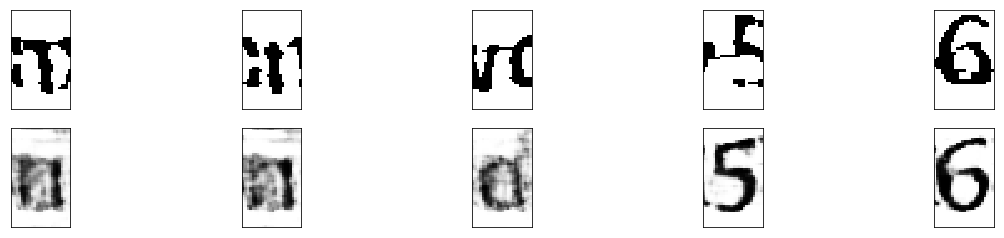

In [9]:
decoded_imgs = autoencoder.predict(x_test)
n = 5
plt.figure(figsize=(20, 4))
for i in range(n):
    i = i + 1
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(40, 24))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(40, 24))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


### Salt and Peper Noise

In [10]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * \
    np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * \
    np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [11]:
# Retrain model.
history = autoencoder.fit_generator(datagen.flow(x_train, y_train, batch_size=64),
                                    epochs=1, validation_data=(x_test_noisy, y_test),
                                    verbose=1, steps_per_epoch=x_train.shape[0],
                                    callbacks=[learning_rate_reduction, early_stopping])

Epoch 1/1
4280/4280 [==============================] - 118s 28ms/step - loss: 0.1974 - acc: 0.9194 - val_loss: 0.3002 - val_acc: 0.8668


### Visualise Denoised Images

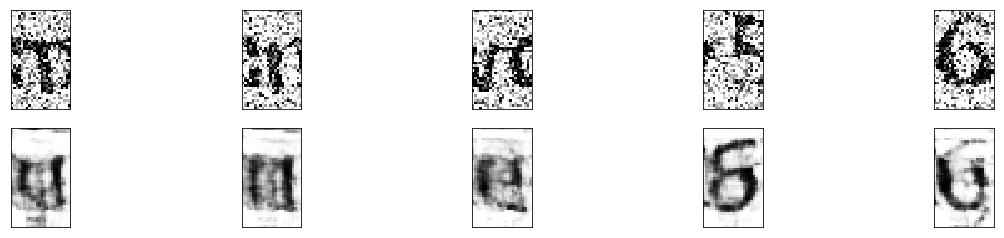

In [12]:
decoded_imgs = autoencoder.predict(x_test_noisy)
n = 5
plt.figure(figsize=(20, 4))
for i in range(n):
    i = i + 1
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(40, 24))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(40, 24))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


## Categorization Neural Network

### Train-test split

In [13]:
# Use denoise images.
decoded_images = autoencoder.predict(data)
(x_train, x_test, y_train, y_test) = train_test_split(
    decoded_images, labels, test_size=0.2, random_state=0)

### Data Augmentation

In [14]:
datagen = ImageDataGenerator( # randomly rotate images in the range (degrees, 0 to 180).
    rotation_range=15,
    zoom_range=0.1, # Randomly zoom image.
    width_shift_range=0.1, # randomly shift images horizontally (fraction of total width).
    height_shift_range=0.1, # randomly shift images vertically (fraction of total height).
)

datagen.fit(x_train)

### Model

In [15]:
# Create model for labelling images.
out = Flatten()(encoder.output)
out = Dense(19, activation='softmax')(out)
labeller = Model(encoder.input, out)

labeller.compile(optimizer=optimizer,
                 loss='binary_crossentropy', metrics=['accuracy'])

history = labeller.fit_generator(datagen.flow(x_train, y_train, batch_size=64),
                                 epochs=1, validation_data=(x_test, y_test),
                                 verbose=1, steps_per_epoch=x_train.shape[0],
                                 callbacks=[learning_rate_reduction, early_stopping])

Epoch 1/1
4280/4280 [==============================] - 87s 20ms/step - loss: 0.0347 - acc: 0.9899 - val_loss: 0.0395 - val_acc: 0.9885


In [16]:
scores = labeller.evaluate(x_test, y_test, verbose=1)
print("Accuracy: ", scores[1])

1070/1070 [==============================] - 0s 105us/step
Accuracy:  0.9885391110571745


## Evaluate Model

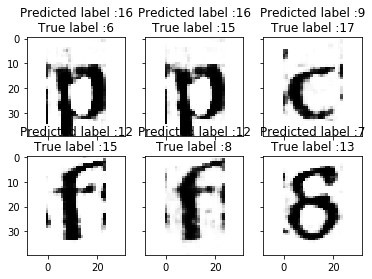

In [21]:
# Display some error results 

# Predict the values from the validation dataset
y_pred = labeller.predict(x_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1) 

# Errors are difference between predicted labels and true labels
errors = (y_pred_classes - y_true != 0)

y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_val_errors = x_test[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((40,24)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
y_pred_errors_prob = np.max(y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, x_val_errors, y_pred_classes_errors, y_true_errors)